In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [176]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
               ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

df = pd.read_csv("adult.data", names = columns, sep=',')
df = df.replace(' ?', np.nan)
df = df.dropna()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [166]:
less_df = df[df['income'].str.contains('<=50K')]
more_df = df[df['income'].str.contains('>50K')]
#more_df.groupby('education-num').size().plot(kind = 'line',figsize = (20,5),title = 'the infect of different education')

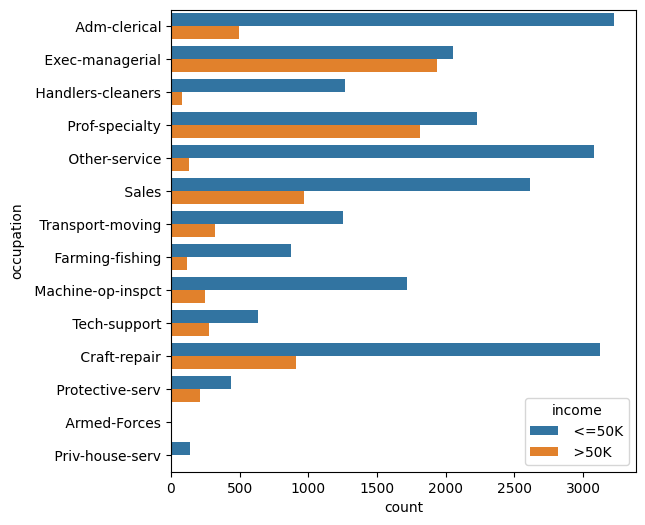

In [289]:
# user story 1, the realtionship between occupution and income
fig = plt.figure(figsize=(6,6))
occu_income = sns.countplot(data = df, y = 'occupation', hue = 'income')

plt.show()

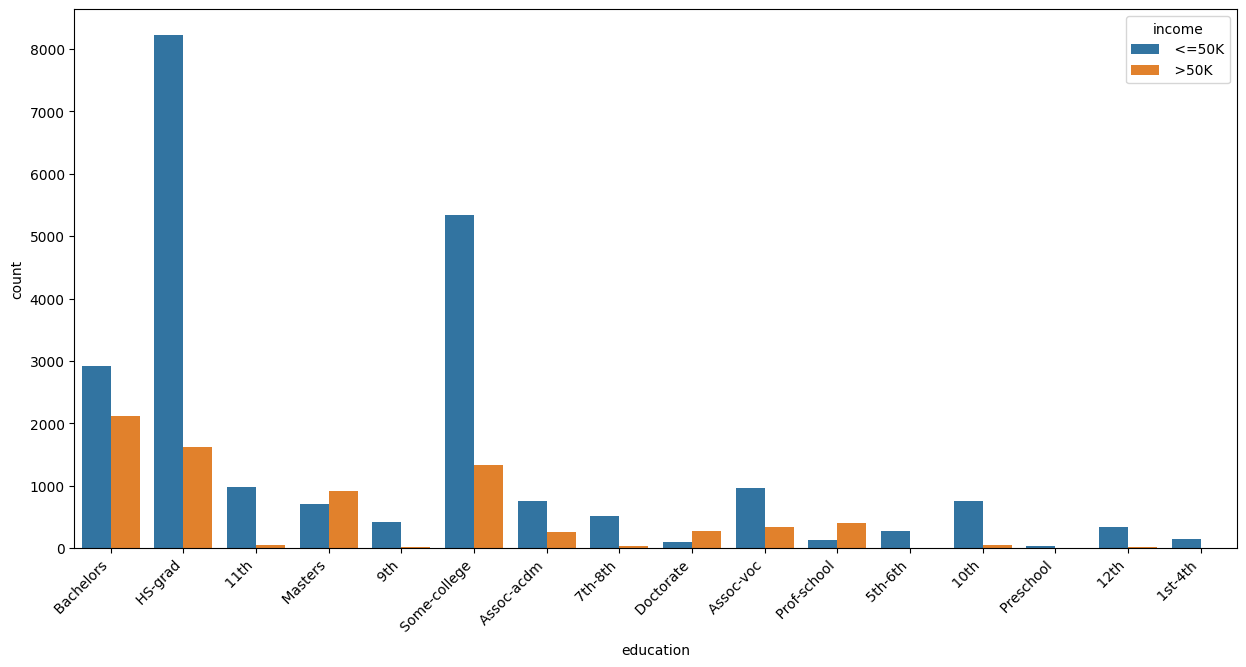

In [318]:
# user story 2 , the relation between education and income
fig = plt.figure(figsize=(15,7))
edu_income = sns.countplot(data = df, x = 'education', hue = 'income')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

<AxesSubplot: xlabel='education-num', ylabel='Density'>

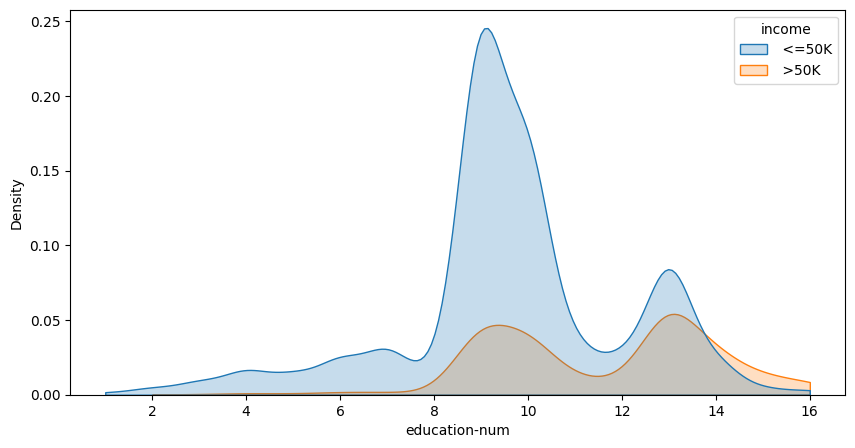

In [286]:
# user story 2 , the relation between education and income
fig = plt.figure(figsize=(10,5))
sns.kdeplot(data = df, x = 'education-num', hue = 'income', bw_adjust=1.5, cut=0, fill = bool)

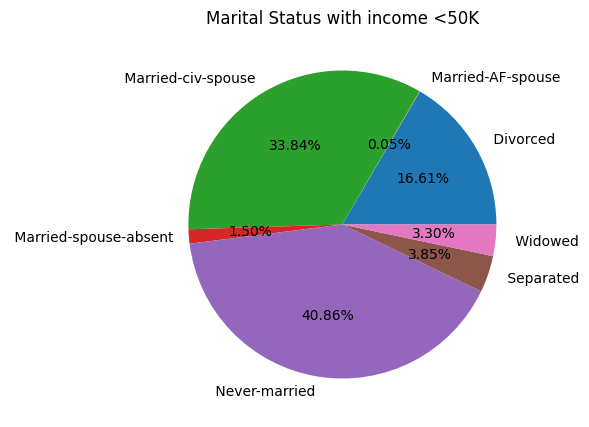

In [319]:
# user story 3, the relationship between matital-status and income < 50k
less_df.groupby('marital-status').size().plot(kind='pie', figsize=(5, 5), autopct = '%.2f%%', title='Marital Status with income <50K')
plt.show()

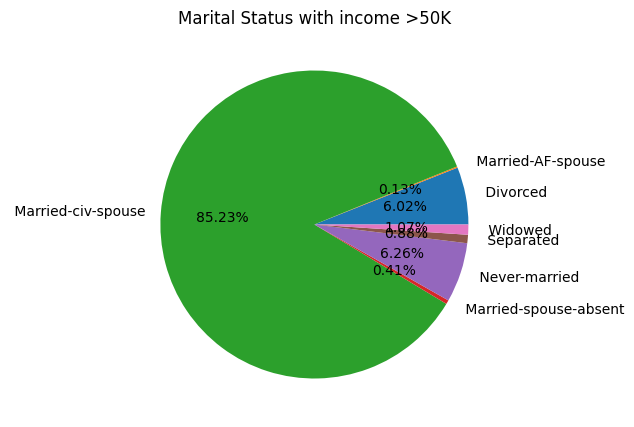

In [285]:
# user story 3, the relationship between matital-status and income > 50k

more_df.groupby('marital-status').size().plot(kind='pie', figsize=(5, 5), autopct = '%.2f%%', title='Marital Status with income >50K')
plt.show()

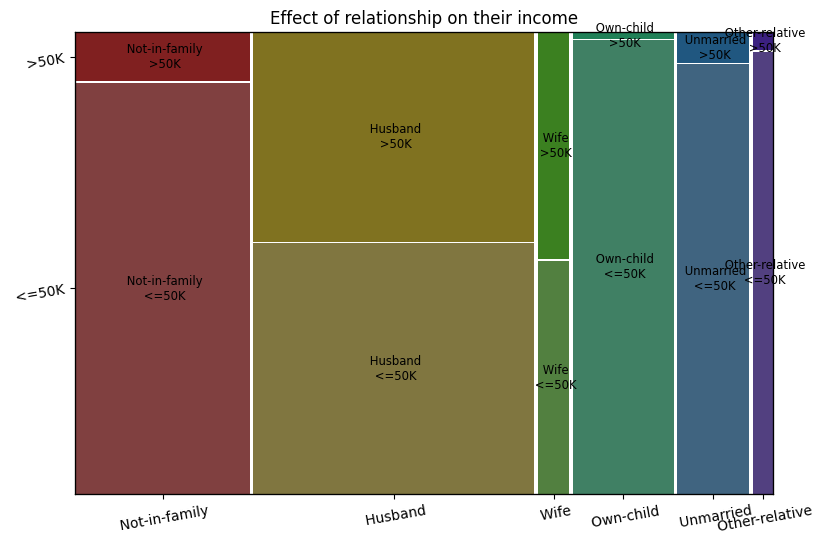

In [268]:
# user story 4, the Effect of relationship on income 
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
mosaic(df, ['relationship', 'income'], ax=axes, axes_label=True, gap=0.005,
       title='Effect of relationship on income',label_rotation=10)
plt.show()

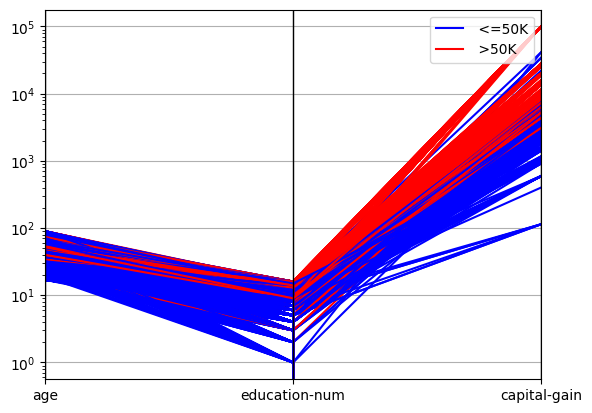

In [197]:
#user story 5, pcp of age, education-num, capital-gain
data_para = df[['age','education-num','capital-gain','income']]
ax = pd.plotting.parallel_coordinates(data_para,'income', color=['b','r'])
ax.set_yscale('log')
plt.show()

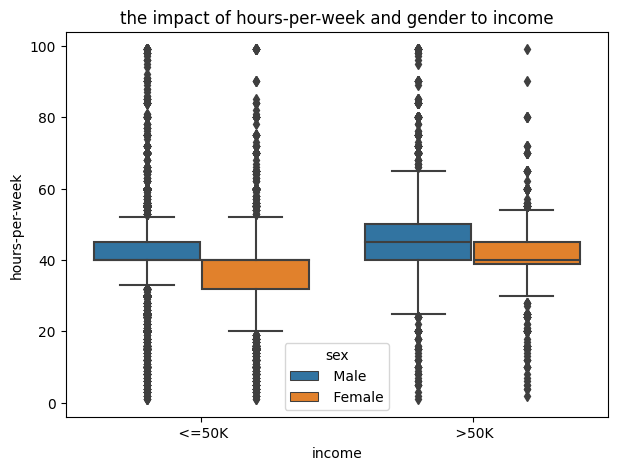

In [315]:
# user story 6, the boxplot of hours-per-week in defferent gender
plt.figure(figsize=(7,5))
ax = sns.boxplot(x='income',y='hours-per-week',hue='sex',data=df)
ax.set_title("the impact of hours-per-week and gender to income")
plt.show()

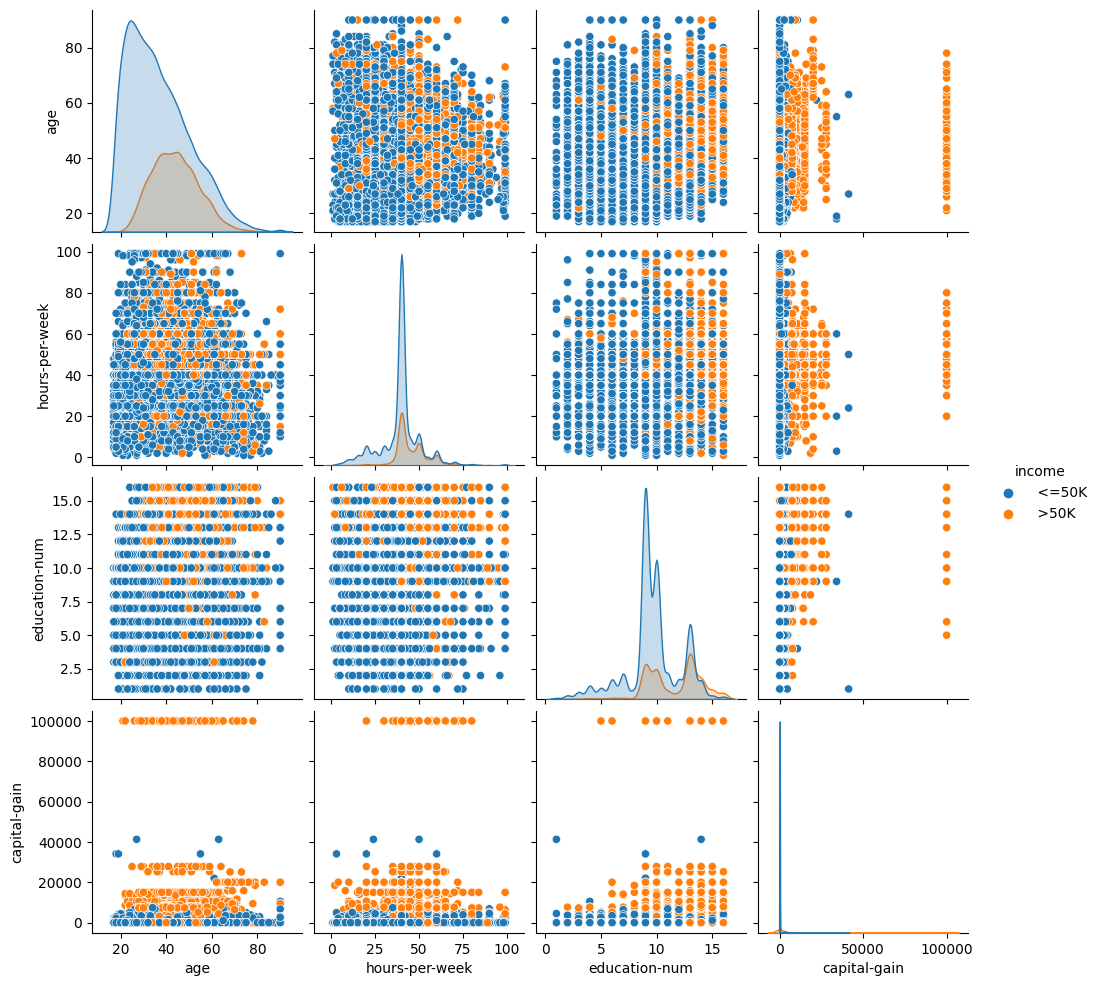

In [305]:
# user story 7, scatter matrix 
data_para = df[['age','hours-per-week','education-num','capital-gain','income']]
sns.pairplot(data_para,hue='income')

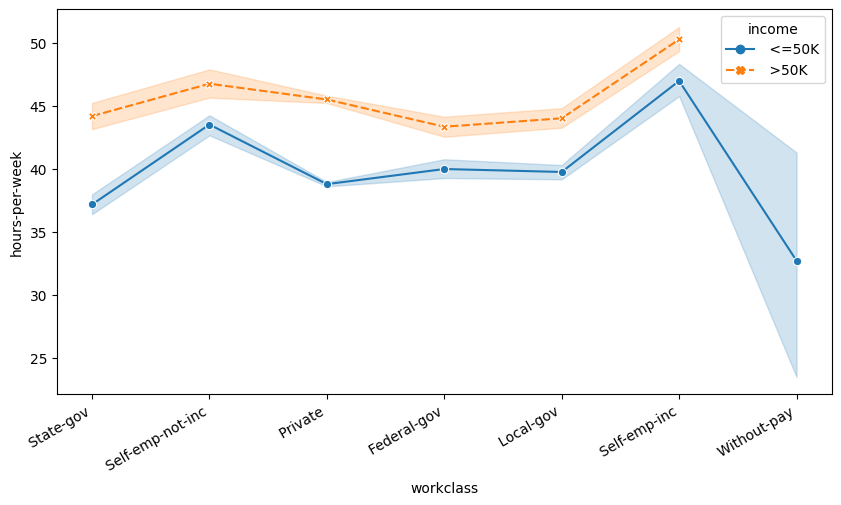

In [276]:
# other graph
fig = plt.figure(figsize=(10,5))
edu_hours = sns.lineplot(data = df, x = 'workclass', y = 'hours-per-week', hue = 'income', style = 'income', markers= True)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

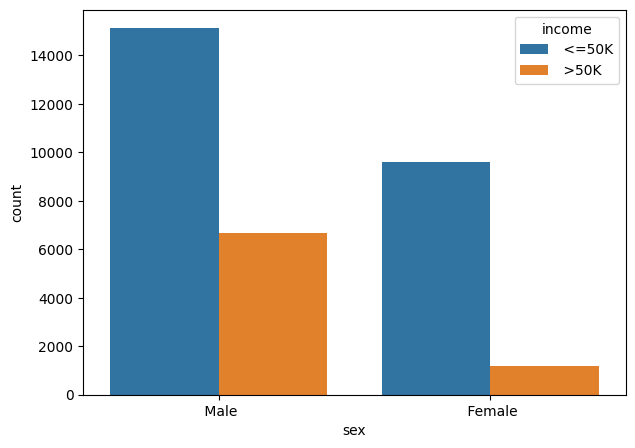

In [118]:
# other graph
fig = plt.figure(figsize=(7,5))
sex_income = sns.countplot(data = df, x = 'sex', hue = 'income')

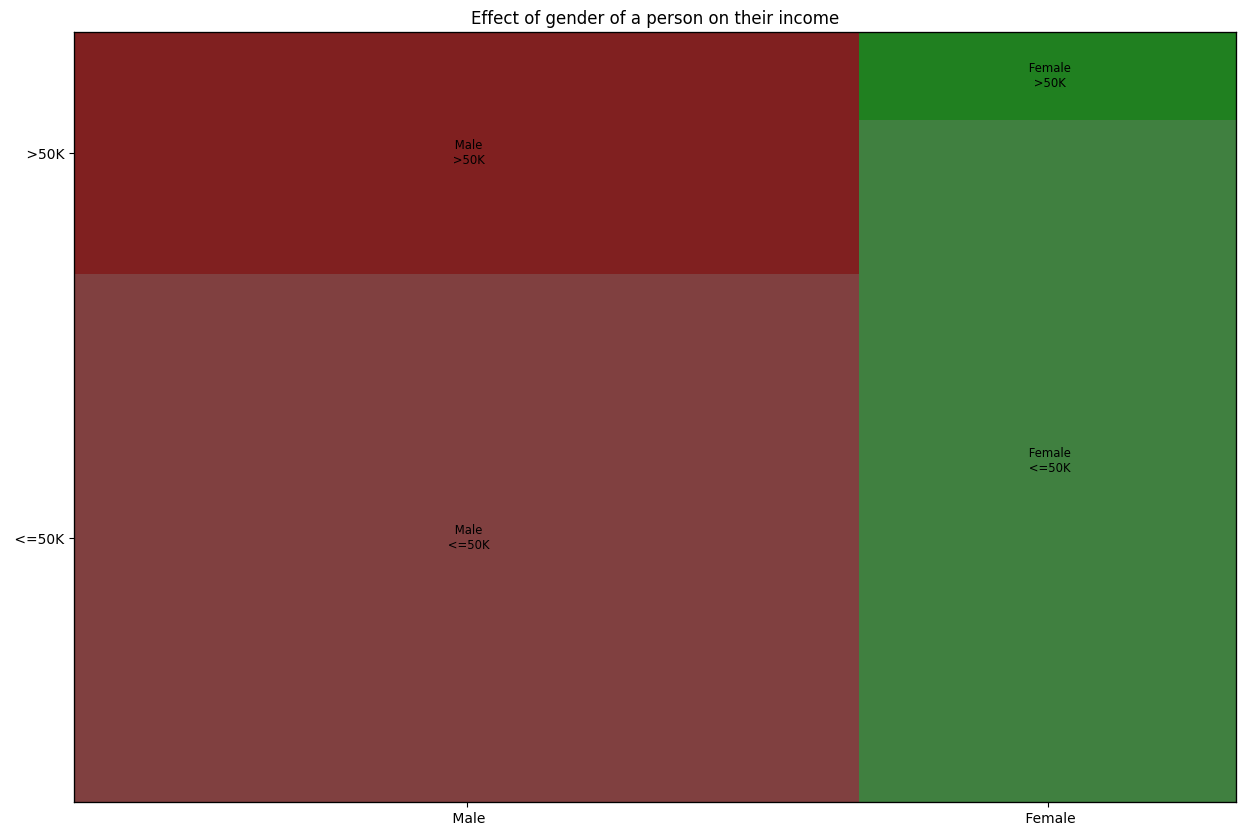

In [320]:
# other graph
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
mosaic(df, ['sex', 'income'], ax=axes, axes_label=True, gap=0,
       title='Effect of gender of a person on their income')
plt.show()

In [325]:
# other graph
'''
fig = plt.figure(figsize=(20,5))
item_counts = df["race"].value_counts()

#item_counts.to_frame()

pd.DataFrame(item_counts)
print(item_counts)
#race_income = sns.countplot(data = df, y = 'race', hue = 'income')
more_counts = more_df["race"].value_counts()
print(more_counts)

#raceDF = 
plt.show()
'''

'\nfig = plt.figure(figsize=(20,5))\nitem_counts = df["race"].value_counts()\n\n#item_counts.to_frame()\n\npd.DataFrame(item_counts)\nprint(item_counts)\n#race_income = sns.countplot(data = df, y = \'race\', hue = \'income\')\nmore_counts = more_df["race"].value_counts()\nprint(more_counts)\n\n#raceDF = \nplt.show()\n'

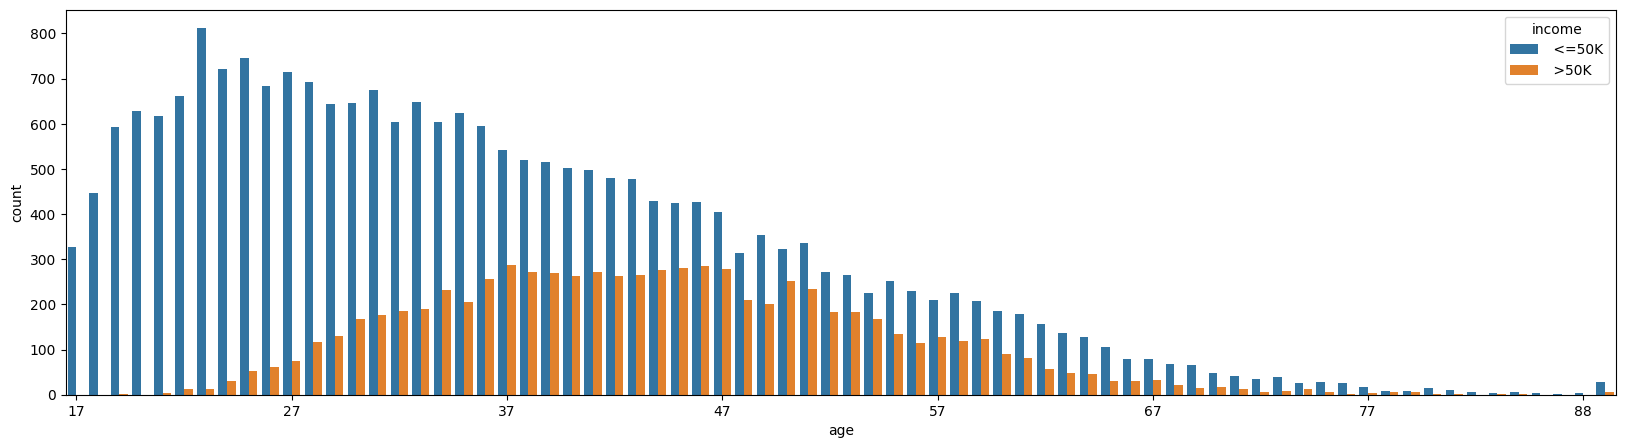

In [322]:
# other graph
fig = plt.figure(figsize=(20,5))
age_income = sns.countplot(data = df, x = 'age', hue = 'income')
# set new-ticks
new_ticks = [i.get_text() for i in age_income.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
plt.show()

<Figure size 2000x500 with 0 Axes>

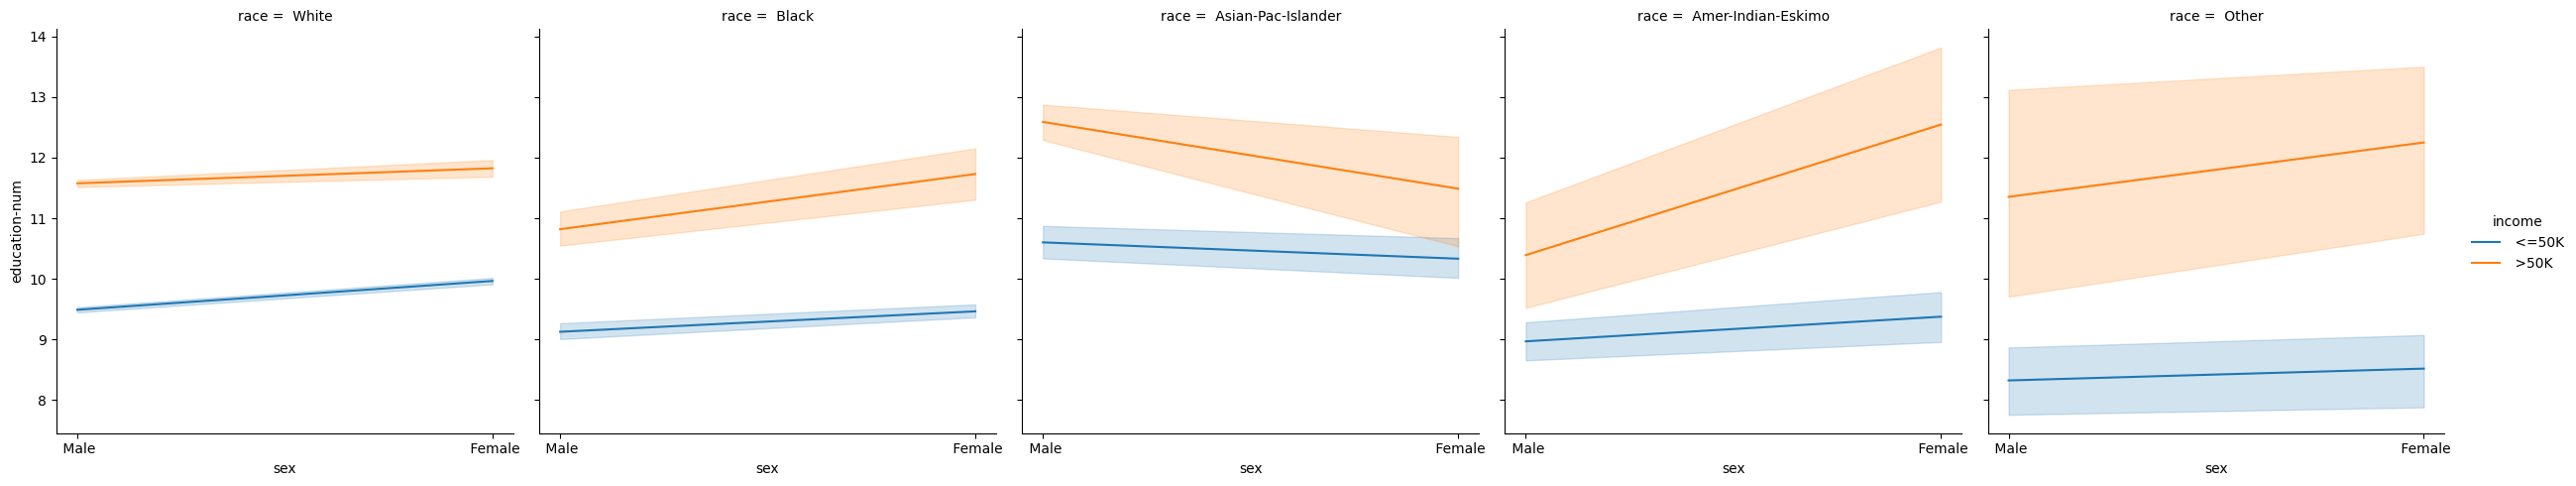

In [323]:
# other graph
fig = plt.figure(figsize=(20,5))
edu_race = sns.relplot(data=df,  x= 'sex', y = 'education-num', col = 'race', hue = 'income', kind = 'line')
plt.show()

<AxesSubplot: xlabel='age', ylabel='Density'>

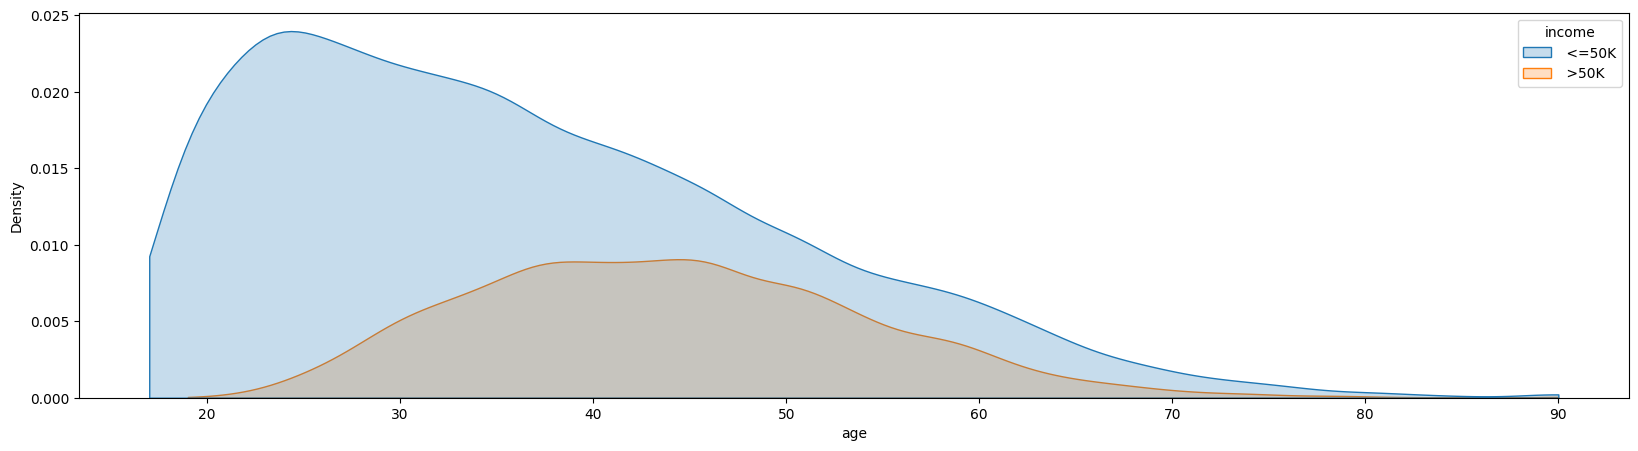

In [324]:
# other graph
fig = plt.figure(figsize=(20,5))
sns.kdeplot(data = df, x = 'age', hue = 'income', bw_adjust=1, cut=0, fill = bool)